In [177]:
import pandas as pd
import krs_harvester.wsgi
import matplotlib
%matplotlib inline
from django_pandas.io import read_frame

In [178]:
from organizations.models import Organization

In [179]:
from donations.models import Donation

In [202]:
import sqlite3
conn = sqlite3.connect('db.sqlite3')
donations = pd.read_sql(
    'select d.id id, money / 1000000.0 money,'
    'date, o.name org_name, o.wojewodztwo wojewodztwo, o.city city ' 
    'from donations_donation d '
    'join organizations_organization o on o.id = d.organization_id', conn)
organizations = pd.read_sql('select * from organizations_organization', conn)

In [205]:
donations['percent_money'] = donations.money / donations.money.sum() * 100.0

In [204]:
donations.groupby('city').agg({'money': 'sum', 'id': 'count'}).sort_values('money', ascending=False)

,money,id
city,,
Warszawa,819.955719,3228
Wrocław,117.858828,1142
Kraków,108.478603,846
Stawnica,56.137215,4
łódź,48.021735,709
Poznań,34.339620,740
Katowice,26.369159,404
Częstochowa,26.079669,214
Gdańsk,24.698513,737


In [182]:
donations.groupby('org_name').agg({'money': 'sum', 'id': 'count'}).sort_values('money', ascending=False)

,money,id
org_name,,
"FUNDACJA DZIECIOM ""ZDĄŻYĆ Z POMOCĄ""",441.733754,4
"FUNDACJA POMOCY OSOBOM NIEPEŁNOSPRAWNYM ""SŁONECZKO""",56.137215,4
"FUNDACJA ""ROSA""",30.468085,4
FUNDACJA ANNY DYMNEJ MIMO WSZYSTKO,27.111596,4
AVALON - BEZPOŚREDNIA POMOC NIEPEŁNOSPRAWNYM,26.848567,4
DOLNOŚLĄSKA FUNDACJA ROZWOJU OCHRONY ZDROWIA,23.018024,4
"""FUNDACJA TVN NIE JESTEŚ SAM""",22.778074,4
"FUNDACJA ""NA RATUNEK DZIECIOM Z CHOROBĄ NOWOTWOROWĄ""",17.781596,4
"STOWARZYSZENIE RODZICÓW NA RZECZ POMOCY SZKOŁOM ""PRZYJAZNA SZKOŁA""",17.074487,4


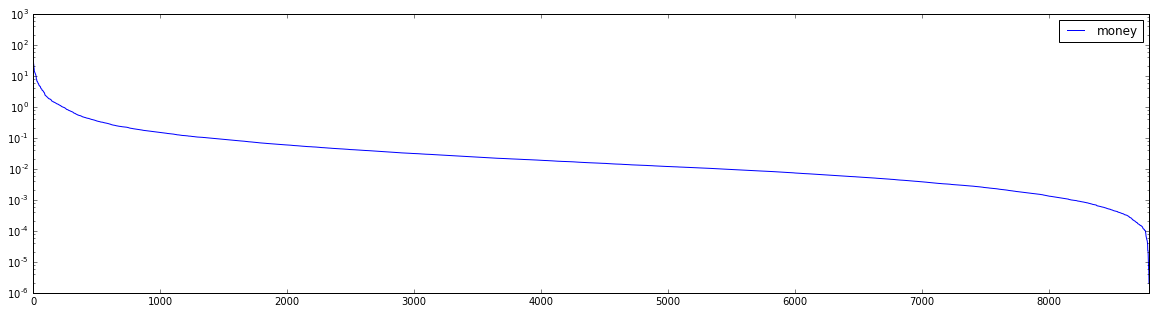

In [229]:
(
    donations.groupby('org_name').agg({'money': 'sum'})
    .sort_values('money', ascending=False)
    .plot(figsize=(20, 5), use_index=False, logy=True)
)

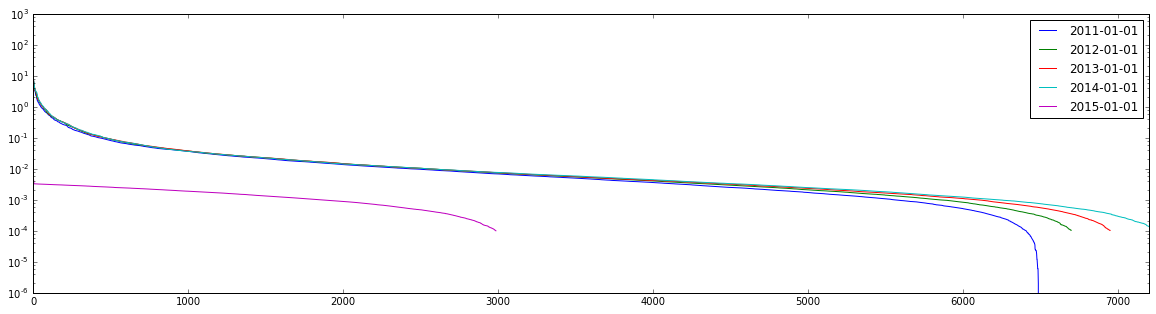

In [184]:
import matplotlib.pyplot as plt
fig = plt.figure()
dates = ['%s-01-01' % i for i in [2011, 2012, 2013, 2014, 2015]]
plots = [
    donations
        .query('date == "%s"' % date)
        .groupby('org_name').agg({'money': 'sum'})
        .sort_values('money', ascending=False)
        .money.plot(figsize=(20, 5), use_index=False, logy=True)
    for date in dates
]
plt.legend(plots[0].get_lines(), dates)

In [185]:
donations.groupby('wojewodztwo').agg({'money': 'sum', 'id': 'count'}).sort_values('money', ascending=False)

,money,id
wojewodztwo,,
7.0,884.583184,4790
6.0,155.770846,2399
12.0,147.798134,3195
1.0,144.085030,3215
15.0,139.641847,2125
11.0,66.747119,2299
5.0,62.727807,1550
3.0,39.290305,1393
2.0,36.041625,1058


In [186]:
orgs = pd.read_sql(
    'select o.id id, sum(d.money) / 1000000.0 money,'
    'o.name org_name, o.wojewodztwo wojewodztwo, o.city city ' 
    'from organizations_organization o '
    'join donations_donation d on o.id = d.organization_id '
    'group by o.id', conn)

In [187]:

q = orgs.groupby('city').agg({'money': 'sum', 'id': 'count'})
q['money_per_org'] = q.money / q.id
qq = q[['money', 'money_per_org', 'id']].sort_values('money_per_org', ascending=False)
qq

,money,money_per_org,id
city,,,
Stawnica,56.137215,56.137215,1
Wolica,10.196563,10.196563,1
Lublinie,4.716920,4.716920,1
Sadurki,4.480295,4.480295,1
Rabka-zdrój,13.325650,4.441883,3
Dziekanów Leśny,3.908411,3.908411,1
Bojano,12.188893,3.047223,4
Baranówko,2.026907,2.026907,1
Laski,5.740456,1.913485,3


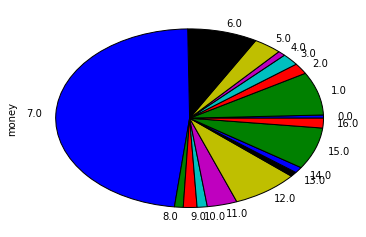

In [195]:
donations.groupby('wojewodztwo').sum().money.plot(kind='pie')

In [218]:
donations.groupby('city').agg({'percent_money': 'sum'}).sort_values('percent_money', ascending=False)

,percent_money
city,
Warszawa,4.435731e+01
Wrocław,6.375833e+00
Kraków,5.868389e+00
Stawnica,3.036866e+00
łódź,2.597842e+00
Poznań,1.857677e+00
Katowice,1.426498e+00
Częstochowa,1.410837e+00
Gdańsk,1.336121e+00


In [211]:
donations.groupby('wojewodztwo').agg({'percent_money': 'sum'}).sort_values('percent_money', ascending=False)

,percent_money
wojewodztwo,
7.0,47.853478
6.0,8.426767
12.0,7.995466
1.0,7.794597
15.0,7.554234
11.0,3.610833
5.0,3.393399
3.0,2.125496
2.0,1.949751


In [219]:
donations.groupby('org_name').agg({'percent_money': 'sum'}).sort_values('percent_money', ascending=False)

,percent_money
org_name,
"FUNDACJA DZIECIOM ""ZDĄŻYĆ Z POMOCĄ""",2.389656e+01
"FUNDACJA POMOCY OSOBOM NIEPEŁNOSPRAWNYM ""SŁONECZKO""",3.036866e+00
"FUNDACJA ""ROSA""",1.648238e+00
FUNDACJA ANNY DYMNEJ MIMO WSZYSTKO,1.466662e+00
AVALON - BEZPOŚREDNIA POMOC NIEPEŁNOSPRAWNYM,1.452432e+00
DOLNOŚLĄSKA FUNDACJA ROZWOJU OCHRONY ZDROWIA,1.245211e+00
"""FUNDACJA TVN NIE JESTEŚ SAM""",1.232230e+00
"FUNDACJA ""NA RATUNEK DZIECIOM Z CHOROBĄ NOWOTWOROWĄ""",9.619347e-01
"STOWARZYSZENIE RODZICÓW NA RZECZ POMOCY SZKOŁOM ""PRZYJAZNA SZKOŁA""",9.236820e-01


In [243]:
## 1%
grouped_donations = donations.groupby('org_name')
len_donations = len(grouped_donations)
one_per_donations = int(len_donations * 0.01)
one_per_donations
(
    grouped_donations
    .agg({'money': 'sum', 'percent_money': 'sum'})
    .sort_values('money', ascending=False)[:one_per_donations]
    .sum()
)

money            1158.337464
percent_money      62.662820
dtype: float64

In [242]:
## 0.5%
grouped_donations = donations.groupby('org_name')
len_donations = len(grouped_donations)
one_per_donations = int(len_donations * 0.005)
one_per_donations
(
    grouped_donations
    .agg({'money': 'sum', 'percent_money': 'sum'})
    .sort_values('money', ascending=False)[:one_per_donations]
    .sum()
)

money            982.527902
percent_money     53.152014
dtype: float64

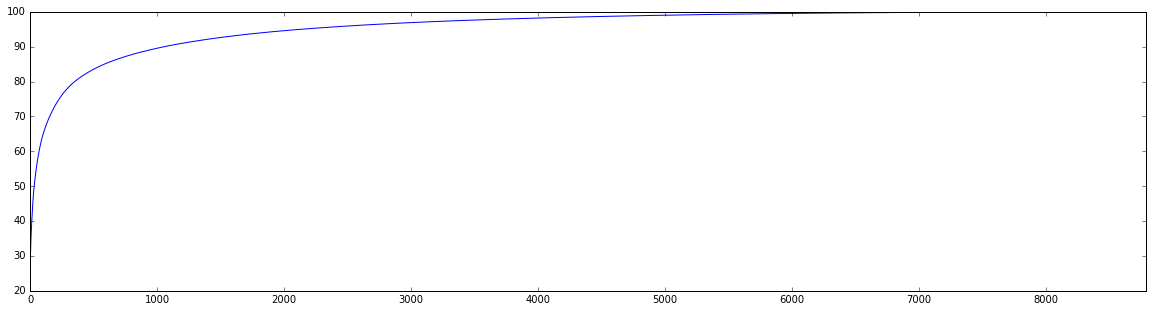

In [244]:
( # cumulative sum plot
    grouped_donations
    .agg({'percent_money': 'sum'})
    .sort_values('percent_money', ascending=False)
    .cumsum().percent_money
    .plot(figsize=(20, 5), use_index=False)
)

In [245]:
( # cumulative sum
    grouped_donations
    .agg({'percent_money': 'sum'})
    .sort_values('percent_money', ascending=False)
    .cumsum()
)

,percent_money
org_name,
"FUNDACJA DZIECIOM ""ZDĄŻYĆ Z POMOCĄ""",23.896562
"FUNDACJA POMOCY OSOBOM NIEPEŁNOSPRAWNYM ""SŁONECZKO""",26.933428
"FUNDACJA ""ROSA""",28.581666
FUNDACJA ANNY DYMNEJ MIMO WSZYSTKO,30.048328
AVALON - BEZPOŚREDNIA POMOC NIEPEŁNOSPRAWNYM,31.500760
DOLNOŚLĄSKA FUNDACJA ROZWOJU OCHRONY ZDROWIA,32.745971
"""FUNDACJA TVN NIE JESTEŚ SAM""",33.978201
"FUNDACJA ""NA RATUNEK DZIECIOM Z CHOROBĄ NOWOTWOROWĄ""",34.940136
"STOWARZYSZENIE RODZICÓW NA RZECZ POMOCY SZKOŁOM ""PRZYJAZNA SZKOŁA""",35.863818
